1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

Here is an overview of the dataframe : 
        label  features_1  features_2  features_3  features_4  features_5  \
0  -89.243497    2.175170   -0.285786   -0.603396   -0.627453   -0.686474   
1  230.050125    1.481941   -1.327870   -0.543583   -0.303578    1.552964   
2 -286.844411   -1.154394   -0.178649   -1.636646    0.239353   -0.684994   
3  364.552862    0.197665    1.455707    1.562205    2.168207    0.053335   
4  515.460006    0.596676    0.969860    1.294158   -0.404728    2.145297   

   features_6  features_7  features_8  features_9  ...  features_11  \
0    0.381067    0.306205   -0.637447   -1.332087  ...     1.290725   
1    0.549738   -0.763094   -0.455796    2.053388  ...    -1.761306   
2    0.587201   -0.209564   -0.428956   -0.757998  ...     0.374645   
3    0.790492   -0.212023   -1.142483   -1.124906  ...     0.712160   
4    0.997481   -0.541670   -0.952850   -0.592084  ...    -1.347072   

   features_12  features_13  features_14  features_15  features_16  \


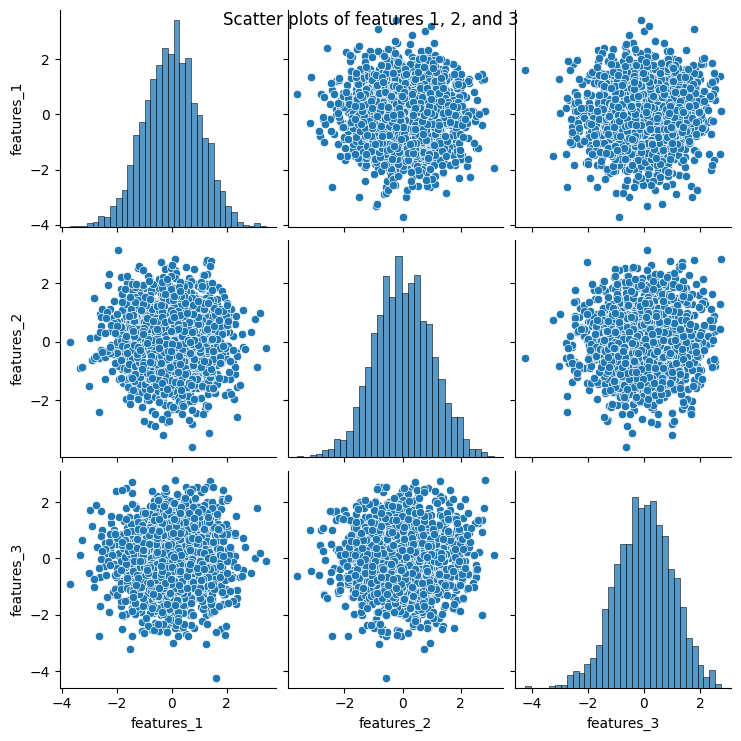

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P ./data/

filename = "./data/regression_generated.csv"
df = pd.read_csv(filename)

print(f"Here is an overview of the dataframe : \n{df.head()}")

features = ['features_1', 'features_2', 'features_3']
selected_data = df[features]

sns.pairplot(selected_data)
plt.suptitle("Scatter plots of features 1, 2, and 3")
plt.show()

# => Are these features correlated? 
# Pair plots indicate that 'features_1', 'features_2', and 'features_3' are not linearly correlated.
# - Scatter plots show a circular distribution with no clear trend, suggesting no direct correlation
# - The histograms on the diagonal show that the distributions of each feature are approximately normal.

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [2]:
#from IPython.display import Image
#Image('images/two_categories_scatter_plot.png')

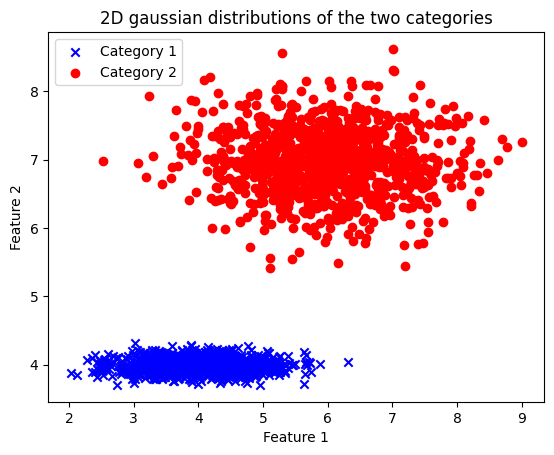

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def generate_2D_dataset(N, mu1, sigma1, mu2, sigma2):
    # Creation of the two set
    category1 = np.random.normal(mu1, sigma1, (n, 2))
    category2 = np.random.normal(mu2, sigma2, (n, 2))

    df_cat1 = pd.DataFrame(category1, columns=['Feature1', 'Feature2'])
    df_cat2 = pd.DataFrame(category2, columns=['Feature1', 'Feature2'])

    return df_cat1, df_cat2

n = 1000
mu1, sigma1 = (4, 4), (0.7, 0.1)  # mean and standard deviation for category 1
mu2, sigma2 = (6, 7), (1, 0.5)  # mean and standard deviation for category 2

df_cat1, df_cat2 = generate_2D_dataset(n, mu1, sigma1, mu2, sigma2)

plt.scatter(df_cat1['Feature1'], df_cat1['Feature2'], color='blue', marker='x', label='Category 1')
plt.scatter(df_cat2['Feature1'], df_cat2['Feature2'], color='red', marker='o', label='Category 2')
plt.title('2D gaussian distributions of the two categories')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

Here is the filtered dataframe : 
       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


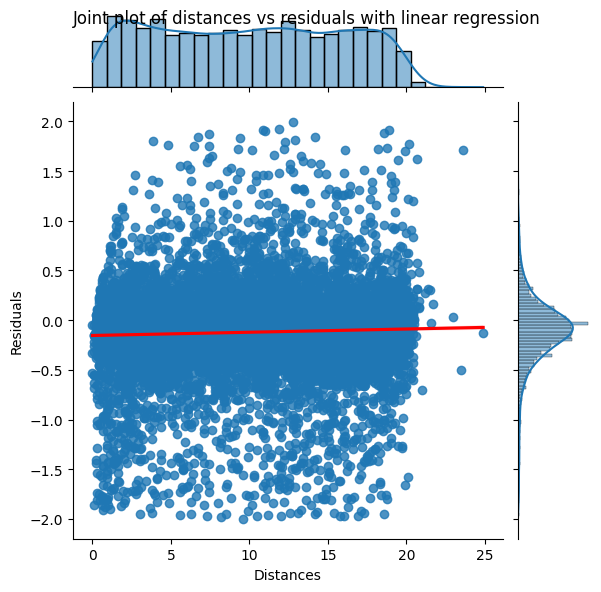

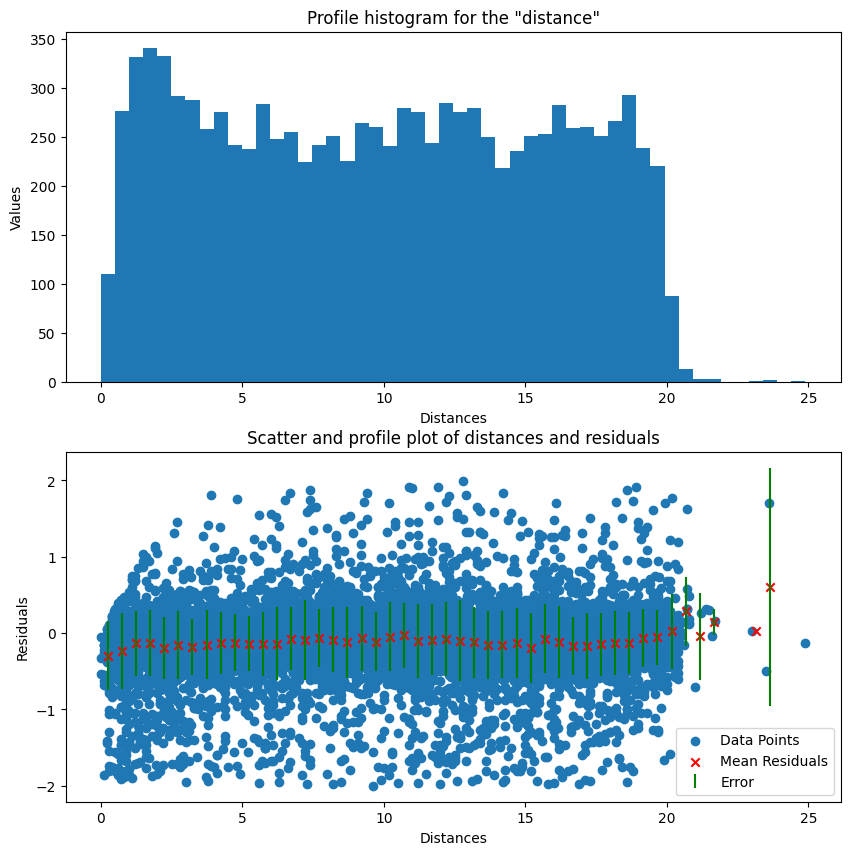

In [4]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

import pandas as pd
import pickle

# Load the pickle file
filename = "data/residuals_261.pkl"
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()

# Creation of the dataframe
df = pd.DataFrame(new_dict.item())
df = df[df['residuals'].abs() < 2]

print(f"Here is the filtered dataframe : \n{df}")

sns.jointplot(x='distances', y='residuals', data=df, kind='reg', joint_kws={'line_kws':{'color':'red'}})
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.suptitle('Joint plot of distances vs residuals with linear regression')
plt.show()

# => Comment on the correlation between these variables.
# Analysis of the graph suggests the absence of linear correlation between the 'distance' and 'residual' variables, as shown by the almost horizontal regression line and the wide dispersion of the data points. 
# The distributions of both variables are symmetrical and show no clear trends or patterns, indicating that residuals vary independently of distances.


# Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
# Creation of the profile histogram for the "distance" variable
# - x, the array of bin centers of the profile histogram of the "distance" variable
# - y, the mean values of the "residuals", estimated in slices (bins) of "distance"
# - err_y, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"

fig, ax = plt.subplots(2,1, figsize=(10, 10))

_, bins_edges, _ = ax[0].hist(df['distances'], bins=50, range = (df['distances'].min(), df['distances'].max()))
ax[0].set_xlabel('Distances')
ax[0].set_ylabel('Values')
ax[0].set_title('Profile histogram for the "distance"')

x = (bins_edges[1:]+bins_edges[:-1])/2

y = []
err_y = []
for i in range(len(bins_edges)-1):
    bin_data = df[(df['distances']>=bins_edges[i]) & (df['distances']<bins_edges[i + 1])]
    y.append(bin_data['residuals'].mean())
    err_y.append(bin_data['residuals'].std())

ax[1].scatter(df['distances'], df['residuals'], label='Data Points')
ax[1].scatter(x, y, marker='x', color='red', label='Mean Residuals')
ax[1].errorbar(x, y, err_y, color='green', fmt='none', label='Error')
ax[1].set_xlabel('Distances')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Scatter and profile plot of distances and residuals')
ax[1].legend()
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


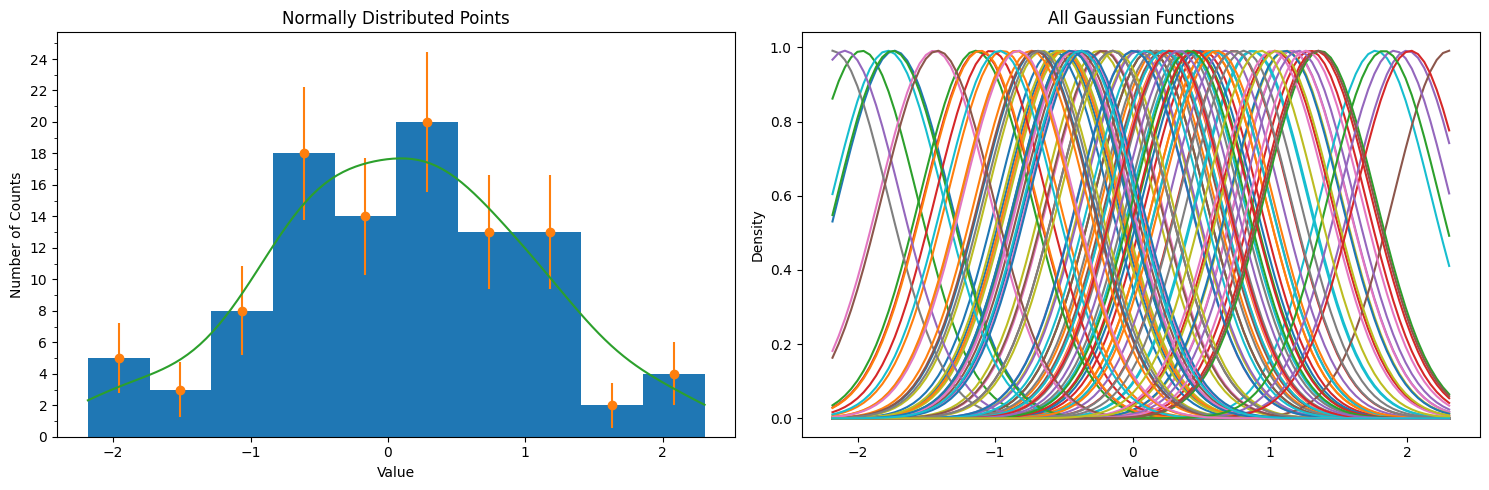

In [5]:
import numpy as np
from scipy import stats
from scipy.integrate import trapz
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

mean, std_dev, N = 0, 1, 100  # Mean and standard deviation for normal distribution, number of samples
x = np.random.normal(mean, std_dev, N)  # data with normal distribution

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

bin_error = int(np.sqrt(x.shape[0]))
counts, bin_edges, _ = axes[0].hist(x, bins=bin_error)
bin_mean = (bin_edges[1:] + bin_edges[:-1]) / 2
bin_width = bin_edges[1] - bin_edges[0]
axes[0].errorbar(bin_mean, counts, yerr=np.sqrt(counts), fmt='o')  # Adding error bars with Poisson uncertainty
axes[0].yaxis.set_major_locator(MultipleLocator(2))
axes[0].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[0].set_title("Normally Distributed Points")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Number of Counts")

adjusted_std_dev = 1.06 * x.std() * (N ** (-1 / 5))

gaussian_x = np.linspace(x.min(), x.max(), N)
gaussian_densities = []
for value in x:
    gaussian_densities.append(stats.norm.pdf(gaussian_x, loc=value, scale=adjusted_std_dev))
    axes[1].plot(gaussian_x, gaussian_densities[-1])
axes[1].set_title("All Gaussian Functions")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")

sum_gaussians = np.sum(gaussian_densities, axis=0)
normalization = trapz(sum_gaussians, gaussian_x)
normalized_sum = sum_gaussians * bin_width * sum(counts) / normalization
axes[0].plot(gaussian_x, normalized_sum)

plt.tight_layout()
plt.show()